# Impor packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.getcwd()

'C:\\Users\\USER\\Project_Python\\MySkill\\Data Analysis_use case Clustering Model'

In [ ]:
pd.set_option('display.max_columns', None)

# Memuat Dataset

In [ ]:
df = pd.read_csv('clustering_data.csv', header=0)
df

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,G28036,Bogor,Internet Banking,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,G04482,Bandung,Cabang,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,G07807,Bandung,Aplikasi Digital,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28124,G14522,Solo,Cabang,2 - 3 Tahun,47.0,Perempuan,Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,364,600734753
28125,G15052,Bandung,Telemarketing,2 - 3 Tahun,38.0,Perempuan,Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,350,764670896
28126,G06299,Jogja,Internet Banking,2 - 3 Tahun,58.0,Laki-laki,Cerai,4,Tidak Sekolah Formal,1,1,1,1,1,1,6,365,629634394
28127,G17962,Jakarta,Telemarketing,2 - 3 Tahun,NaN,Perempuan,Janda/Duda,1,Tidak Sekolah Formal,1,1,1,1,1,1,6,225,423564729


## Assessing Data

**Memeriksa tipe data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28129 entries, 0 to 28128
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GCIF                        28129 non-null  object 
 1   Area                        28129 non-null  object 
 2   Jalur_Pembukaan             28129 non-null  object 
 3   Vintage                     28129 non-null  object 
 4   Usia                        24084 non-null  float64
 5   Jenis_Kelamin               28129 non-null  object 
 6   Status_Perkawinan           28129 non-null  object 
 7   Jumlah_Anak                 28129 non-null  int64  
 8   Pendidikan                  28129 non-null  object 
 9   Produk_Tabungan             28129 non-null  int64  
 10  Produk_Deposito             28129 non-null  int64  
 11  Produk_Kartu_Kredit         28129 non-null  int64  
 12  Produk_Kredit_Rumah         28129 non-null  int64  
 13  Produk_Kredit_Kendaraan     281

**Memeriksa duplikasi data**

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Memeriksa missing values**

In [ ]:
print(df.isnull().sum())

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64


**Memeriksa parameter statistik dari kolom numerik**

In [ ]:
df.describe()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
count,24084.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,2.812900e+04
mean,42.610613,1.300793,0.926055,0.603683,0.332966,0.591525,0.164066,0.537772,3.156067,406.295922,2.490444e+08
std,12.353763,1.442242,0.261686,0.489140,0.471283,0.491561,0.370342,0.498580,1.059098,180.272928,1.582262e+08
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,80.000000,1.028000e+03
25%,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,282.000000,1.210965e+08
50%,43.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,392.000000,2.411094e+08
75%,52.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,498.000000,3.592035e+08
max,70.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,900.000000,8.979315e+08


# Data Understanding

In [ ]:
df.groupby(('Area'))['Area'].count()

Area
Bandung     6917
Bogor       1191
Jakarta     7017
Jogja       3001
Solo        5001
Surabaya    5002
Name: Area, dtype: int64

In [ ]:
# Pilih hanya kolom-kolom numerik
numerik_cols = df.select_dtypes(include=['number']).columns

# Group by 'Area' dan hitung rata-rata untuk kolom-kolom numerik
df_mean = df.groupby('Area')[numerik_cols].mean()
df_mean

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


### Insight :

1. **Usia Rata-Rata**:
   - Usia rata-rata pelanggan di semua area cukup konsisten, sekitar 42 tahun.
   - Surabaya memiliki usia rata-rata tertinggi (42.77 tahun) dan Solo memiliki usia rata-rata terendah (42.45 tahun).

2. **Jumlah Anak Rata-Rata**:
   - Rata-rata jumlah anak per pelanggan juga cukup seragam di semua area, berkisar antara 1.27 hingga 1.37.
   - Bogor memiliki jumlah anak rata-rata tertinggi (1.37) sedangkan Solo memiliki yang terendah (1.27).

3. **Produk Tabungan**:
   - Penggunaan produk tabungan relatif stabil di semua area, dengan rata-rata sekitar 0.92 hingga 0.93.
   - Jogja memiliki rata-rata tertinggi dalam penggunaan produk tabungan (0.934).

4. **Produk Kredit**:
   - Penggunaan produk kredit seperti kartu kredit, kredit rumah, kredit kendaraan, dan kredit dana tunai juga menunjukkan variasi kecil antara area.
   - Rata-rata kepemilikan produk kredit tertinggi berada di Jogja, sedangkan terendah di Bandung.

5. **Total Kepemilikan Produk**:
   - Total kepemilikan produk per pelanggan berkisar antara 3.14 hingga 3.17.
   - Pelanggan di Solo dan Jogja memiliki total kepemilikan produk rata-rata tertinggi (3.165), sementara Bandung memiliki yang terendah (3.142).

6. **Pendapatan Tahunan**:
   - Pendapatan tahunan rata-rata per pelanggan bervariasi dari area ke area, dengan rata-rata tertinggi di Surabaya (409.074 juta) dan terendah di Bogor (402.227 juta).

7. **Total Relationship Balance**:
   - Total relationship balance rata-rata menunjukkan perbedaan yang signifikan antara area, dengan nilai tertinggi di Surabaya (2.523277e+08) dan terendah di Bandung (2.454722e+08).

Secara keseluruhan, terlihat bahwa ada konsistensi dalam beberapa metrik seperti usia rata-rata dan jumlah anak, namun ada juga variasi yang signifikan dalam metrik-metrik finansial seperti pendapatan tahunan dan total relationship balance.

In [ ]:
df.groupby(('Vintage'))['Vintage'].count()

Vintage
2 - 3 Tahun    13953
< 1 Tahun       9278
> 4 Tahun       4898
Name: Vintage, dtype: int64

In [ ]:
# Pilih hanya kolom-kolom numerik
numerik_cols = df.select_dtypes(include=['number']).columns

# Group by 'Area' dan hitung rata-rata untuk kolom-kolom numerik
df_mean = df.groupby('Vintage')[numerik_cols].mean()
df_mean

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


### Insight :

1. **Usia Rata-Rata**:
   - Usia rata-rata pelanggan di semua kategori 'Vintage' berkisar sekitar 42 tahun.
   - Pelanggan dengan 'Vintage' lebih dari 4 tahun memiliki usia rata-rata terendah (42.57 tahun), sementara pelanggan dengan 'Vintage' kurang dari 1 tahun memiliki usia rata-rata tertinggi (42.69 tahun).

2. **Jumlah Anak Rata-Rata**:
   - Rata-rata jumlah anak per pelanggan di semua kategori 'Vintage' cukup konsisten, berkisar antara 1.29 hingga 1.34.
   - Pelanggan dengan 'Vintage' lebih dari 4 tahun memiliki rata-rata jumlah anak tertinggi (1.34), sedangkan pelanggan dengan 'Vintage' 2-3 tahun memiliki rata-rata terendah (1.29).

3. **Produk Tabungan**:
   - Rata-rata kepemilikan produk tabungan relatif stabil di semua kategori 'Vintage', dengan rata-rata tertinggi pada pelanggan dengan 'Vintage' kurang dari 1 tahun (0.93) dan terendah pada pelanggan dengan 'Vintage' lebih dari 4 tahun (0.91).

4. **Produk Kredit**:
   - Pelanggan dengan 'Vintage' lebih dari 4 tahun cenderung memiliki rata-rata penggunaan produk deposito dan produk kartu kredit lebih tinggi dibandingkan dengan kategori lainnya.
   - Penggunaan produk kredit rumah, kendaraan, dan dana tunai cukup konsisten di semua kategori 'Vintage'.

5. **Total Kepemilikan Produk**:
   - Pelanggan dengan 'Vintage' lebih dari 4 tahun memiliki rata-rata total kepemilikan produk tertinggi (3.18), sedangkan pelanggan dengan 'Vintage' kurang dari 1 tahun memiliki rata-rata terendah (3.14).

6. **Pendapatan Tahunan**:
   - Pelanggan dengan 'Vintage' lebih dari 4 tahun memiliki pendapatan tahunan rata-rata tertinggi (422.59 juta), sementara pelanggan dengan 'Vintage' kurang dari 1 tahun memiliki pendapatan tahunan rata-rata terendah (395.61 juta).

7. **Total Relationship Balance**:
   - Total relationship balance rata-rata menunjukkan perbedaan yang signifikan antara kategori 'Vintage', dengan nilai tertinggi pada pelanggan dengan 'Vintage' lebih dari 4 tahun (2.500646e+08) dan terendah pada pelanggan dengan 'Vintage' kurang dari 1 tahun (2.486679e+08).

Dari insight ini, terlihat bahwa pelanggan dengan 'Vintage' lebih dari 4 tahun cenderung memiliki rata-rata kepemilikan produk yang lebih banyak, pendapatan tahunan yang lebih tinggi, dan total relationship balance yang lebih besar dibandingkan dengan kategori 'Vintage' lainnya. Ini bisa menjadi indikasi bahwa semakin lama seorang pelanggan berada di bank, semakin banyak produk yang mereka miliki dan semakin besar kontribusi finansial mereka.

In [ ]:
df.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

Jalur_Pembukaan
Aplikasi Digital     6216
Cabang               5856
Internet Banking     5795
Telemarketing       10262
Name: Jalur_Pembukaan, dtype: int64

In [ ]:
# Pilih hanya kolom-kolom numerik
numerik_cols = df.select_dtypes(include=['number']).columns

# Group by 'Area' dan hitung rata-rata untuk kolom-kolom numerik
df_mean = df.groupby('Jalur_Pembukaan')[numerik_cols].mean()
df_mean

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


### Insight :

1. **Usia Rata-Rata**:
   - Usia rata-rata pelanggan di semua jalur pembukaan cukup seragam, sekitar 42 tahun.
   - Pelanggan yang membuka akun melalui Internet Banking memiliki usia rata-rata tertinggi (42.72 tahun), sedangkan yang melalui Aplikasi Digital memiliki usia rata-rata terendah (42.44 tahun).

2. **Jumlah Anak Rata-Rata**:
   - Jumlah anak rata-rata per pelanggan berkisar antara 1.29 hingga 1.31.
   - Pelanggan yang membuka akun di cabang memiliki jumlah anak rata-rata tertinggi (1.31), sedangkan yang melalui Aplikasi Digital memiliki rata-rata terendah (1.29).

3. **Produk Tabungan**:
   - Penggunaan produk tabungan relatif konsisten di semua jalur pembukaan, dengan rata-rata sekitar 0.92 hingga 0.93.
   - Pelanggan yang membuka akun melalui Aplikasi Digital memiliki kepemilikan produk tabungan tertinggi (0.93).

4. **Produk Kredit**:
   - Penggunaan produk kredit seperti deposito, kartu kredit, kredit rumah, kredit kendaraan, dan kredit dana tunai menunjukkan variasi kecil antar jalur pembukaan.
   - Pelanggan yang membuka akun melalui Internet Banking cenderung memiliki rata-rata penggunaan kartu kredit dan kredit rumah lebih tinggi.

5. **Total Kepemilikan Produk**:
   - Total kepemilikan produk per pelanggan berkisar antara 3.14 hingga 3.17.
   - Pelanggan yang membuka akun melalui Internet Banking memiliki total kepemilikan produk rata-rata tertinggi (3.17).

6. **Pendapatan Tahunan**:
   - Pelanggan yang membuka akun di cabang memiliki pendapatan tahunan rata-rata tertinggi (409.92 juta), sementara yang melalui telemarketing memiliki pendapatan tahunan rata-rata terendah (404.67 juta).

7. **Total Relationship Balance**:
   - Total relationship balance rata-rata menunjukkan perbedaan yang signifikan antar jalur pembukaan, dengan nilai tertinggi pada pelanggan yang membuka akun melalui Internet Banking (2.517532e+08) dan terendah pada pelanggan yang membuka akun di cabang (2.456661e+08).

Dari insight ini, terlihat bahwa jalur pembukaan akun memiliki pengaruh tertentu terhadap berbagai metrik keuangan pelanggan. Misalnya, pelanggan yang membuka akun melalui Internet Banking cenderung memiliki penggunaan produk kredit yang lebih tinggi dan total kepemilikan produk yang lebih banyak.

In [ ]:
df.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

Status_Perkawinan
Belum Menikah     8168
Cerai             4077
Janda/Duda        4045
Menikah          11839
Name: Status_Perkawinan, dtype: int64

In [ ]:
# Pilih hanya kolom-kolom numerik
numerik_cols = df.select_dtypes(include=['number']).columns

# Group by 'Area' dan hitung rata-rata untuk kolom-kolom numerik
df_mean = df.groupby('Status_Perkawinan')[numerik_cols].mean()
df_mean

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


### Insight :

1. **Usia Rata-Rata**:
   - Pelanggan yang berstatus 'Cerai' memiliki usia rata-rata tertinggi (50.23 tahun), sedangkan yang 'Belum Menikah' memiliki usia rata-rata terendah (39.57 tahun).

2. **Jumlah Anak Rata-Rata**:
   - Pelanggan yang berstatus 'Menikah' memiliki jumlah anak rata-rata tertinggi (1.99), sedangkan 'Belum Menikah' tentu saja memiliki rata-rata 0 jumlah anak.

3. **Produk Tabungan**:
   - Semua pelanggan di setiap status perkawinan memiliki rata-rata kepemilikan produk tabungan sebesar 1.00.

4. **Produk Kredit**:
   - Penggunaan produk kredit seperti deposito, kartu kredit, kredit rumah, kendaraan, dan dana tunai menunjukkan variasi kecil antar status perkawinan.
   - Pelanggan yang berstatus 'Menikah' cenderung memiliki rata-rata penggunaan produk kredit rumah tertinggi (0.80), sedangkan pelanggan yang berstatus 'Cerai' memiliki penggunaan produk kredit kendaraan tertinggi (0.51).

5. **Total Kepemilikan Produk**:
   - Pelanggan yang berstatus 'Menikah' memiliki total kepemilikan produk rata-rata tertinggi (3.38), sedangkan yang 'Belum Menikah' memiliki rata-rata terendah (2.92).

6. **Pendapatan Tahunan**:
   - Pelanggan yang berstatus 'Menikah' memiliki pendapatan tahunan rata-rata tertinggi (429.38 juta), sementara yang 'Janda/Duda' memiliki pendapatan tahunan rata-rata terendah (289.65 juta).

7. **Total Relationship Balance**:
   - Total relationship balance rata-rata menunjukkan perbedaan yang signifikan antar status perkawinan, dengan nilai tertinggi pada pelanggan yang berstatus 'Menikah' (2.575412e+08) dan terendah pada pelanggan yang berstatus 'Cerai' (2.393499e+08).

Dari insight ini, terlihat bahwa status perkawinan berpengaruh pada berbagai metrik keuangan dan kepemilikan produk. Misalnya, pelanggan yang berstatus 'Menikah' cenderung memiliki pendapatan tahunan dan total relationship balance yang lebih tinggi, serta total kepemilikan produk yang lebih banyak.

# Data Preparation

**Menangani missing value**

In [ ]:
df[df.Usia.isna()].head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
29,G02181,Bogor,Telemarketing,< 1 Tahun,NaN,Perempuan,Janda/Duda,1,Doktor,1,0,0,0,0,0,1,157,494420190
30,G07219,Surabaya,Cabang,< 1 Tahun,NaN,Laki-laki,Janda/Duda,3,Doktor,1,0,0,0,0,0,1,242,84738965
31,G13813,Bandung,Telemarketing,< 1 Tahun,NaN,Perempuan,Janda/Duda,1,Doktor,1,0,0,0,0,0,1,307,95269032
32,G20901,Bandung,Internet Banking,< 1 Tahun,NaN,Laki-laki,Janda/Duda,2,Doktor,1,0,0,0,0,0,1,183,424443592
122,G00208,Solo,Aplikasi Digital,< 1 Tahun,NaN,Perempuan,Janda/Duda,2,Doktor,1,0,1,0,0,0,2,193,42529955


In [ ]:
# menghapus semua baris tanpa Usia
df = df[~df['Usia'].isna()]

In [ ]:
print(df.isnull().sum())

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24084 entries, 0 to 28126
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GCIF                        24084 non-null  object 
 1   Area                        24084 non-null  object 
 2   Jalur_Pembukaan             24084 non-null  object 
 3   Vintage                     24084 non-null  object 
 4   Usia                        24084 non-null  float64
 5   Jenis_Kelamin               24084 non-null  object 
 6   Status_Perkawinan           24084 non-null  object 
 7   Jumlah_Anak                 24084 non-null  int64  
 8   Pendidikan                  24084 non-null  object 
 9   Produk_Tabungan             24084 non-null  int64  
 10  Produk_Deposito             24084 non-null  int64  
 11  Produk_Kartu_Kredit         24084 non-null  int64  
 12  Produk_Kredit_Rumah         24084 non-null  int64  
 13  Produk_Kredit_Kendaraan     24084 no

**Pengecekan Data Outlier**

In [ ]:
# Mendeteksi dan mengatasi outliers (contoh dengan Z-Score)
from scipy import stats
z_scores = stats.zscore(df[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
df = df[(z_scores < 3).all(axis=1)]  # Menghapus data dengan Z-Score lebih dari 3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23704 entries, 0 to 28126
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GCIF                        23704 non-null  object 
 1   Area                        23704 non-null  object 
 2   Jalur_Pembukaan             23704 non-null  object 
 3   Vintage                     23704 non-null  object 
 4   Usia                        23704 non-null  float64
 5   Jenis_Kelamin               23704 non-null  object 
 6   Status_Perkawinan           23704 non-null  object 
 7   Jumlah_Anak                 23704 non-null  int64  
 8   Pendidikan                  23704 non-null  object 
 9   Produk_Tabungan             23704 non-null  int64  
 10  Produk_Deposito             23704 non-null  int64  
 11  Produk_Kartu_Kredit         23704 non-null  int64  
 12  Produk_Kredit_Rumah         23704 non-null  int64  
 13  Produk_Kredit_Kendaraan     23704 no

**Filtering Data "Telemarketing" Only**

Dikarenakan :
1. Jumlah pelanggan yang membuka akun melalui Telemarketing hampir dua kali lipat dibandingkan jalur pembukaan lainnya.
2. Hal ini menunjukkan bahwa pendekatan proaktif dari telemarketing efektif dalam menarik pelanggan.
maka kita perlu mencari base populasi nya dari jalur ini.

In [ ]:
df_new = df[df['Jalur_Pembukaan']=='Telemarketing']
df_new

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [ ]:
df_new = df_new.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index(drop=True)
df_new = df_new.reset_index()
df_new

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


**Pembagian Dataset Experiment**
1. Experiment 0 --> Semua Variabel Digunakan (df_combined)
2. Experiment 1 --> Menggunakan Demographics (df_exp1)
3. Experiment 2 --> Menggunakan Financial Related Variable (X_num)

In [ ]:
# kolom kategorikal
df_exp1 = df_new.iloc[:,1:8]
df_exp1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [ ]:
# kolom numeric
df_exp2 = df_new.iloc[:,8:17]
df_exp2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


**Melakukan Encoding untuk Data Category**

In [ ]:
df_exp1 = pd.get_dummies(df_exp1, columns=['Area','Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan','Vintage'])
df_exp1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False


**Standardisasi Data untuk Kolom Numerik**

In [ ]:
predname_num = df_exp2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(df_exp2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [ ]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


**Pengecekan Korelasi**

In [ ]:
corrtest1 = df_exp1.corr().abs()
corrtest2 = X_num.corr().abs()

In [ ]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool_))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool_))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
df_exp1 = df_exp1.drop(to_drop, axis=1)
df_exp2 = df_exp2.drop(to_drop1, axis=1)

In [ ]:
# dataset kategorikal
df_exp1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False


In [ ]:
# dataset numerik
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


**gabungkan kembali dataset kategorikal dan dataset numerik**

In [ ]:
df_combined = pd.concat([df_exp1, X_num], axis=1, join='inner')
df_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# Modeling & Evaluation

Pembangunan model akan menggunakan 2 algoritma:
1. K-Means
2. K-Medoid

dengan pengecekan silhouette score

## K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Experiment 0 --> Semua Variabel Digunakan (df_combined)

In [ ]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df_combined)
    silhouette_avg = silhouette_score(df_combined, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df_new['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels

  File "D:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Silhouette Score (K-Means) -3 : 0.43731081737346444
Silhouette Score (K-Means) -4 : 0.37992431452339676
Silhouette Score (K-Means) -5 : 0.3231396807582395


### Experiment 1 --> Menggunakan Demographics (df_exp1)

In [ ]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df_exp1)
    silhouette_avg = silhouette_score(df_exp1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df_new['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.5021981273872203
Silhouette Score (K-Means) -4 : 0.48877557780538605
Silhouette Score (K-Means) -5 : 0.4210233962025565


### Experiment 2 --> Menggunakan Financial Related Variable (X_num = dataset numerik yang sudah distandarisasi)

In [ ]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df_new['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.17568395122545125
Silhouette Score (K-Means) -4 : 0.17500826370194086
Silhouette Score (K-Means) -5 : 0.18806929666647304


## K-Medoids

In [ ]:
#pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

### Experiment 0 --> Semua Variabel Digunakan (df_combined)

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(df_combined)
    silhouette_avg = silhouette_score(df_combined, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df_new['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.43369790762336996
Silhouette Score (K-Medoids) -4 : 0.33519427927551565
Silhouette Score (K-Medoids) -5 : 0.3211940252247904


### Experiment 1 --> Menggunakan Demographics (df_exp1)

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(df_exp1)
    silhouette_avg = silhouette_score(df_exp1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df_new['Clustering_KMedoids_Exp1_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.0050675633465087746
Silhouette Score (K-Medoids) -4 : 0.4657942038387023
Silhouette Score (K-Medoids) -5 : 0.4178025801646672


### Experiment 2 --> Menggunakan Financial Related Variable (X_num = dataset numerik yang sudah distandarisasi)

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df_new['Clustering_KMedoids_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.11659038864364947
Silhouette Score (K-Medoids) -4 : 0.09680611087667028
Silhouette Score (K-Medoids) -5 : 0.08883545658405254


### Insight :

Secara keseluruhan, **k=3 tampaknya merupakan jumlah cluster yang optimal untuk model K-Means** pada dataset ini, karena consistently menghasilkan Silhouette Score tertinggi dan kualitas clustering yang paling baik. Nilai k yang lebih tinggi cenderung mengurangi kualitas clustering, menunjukkan adanya over-segmentasi.

# Analisa Hasil

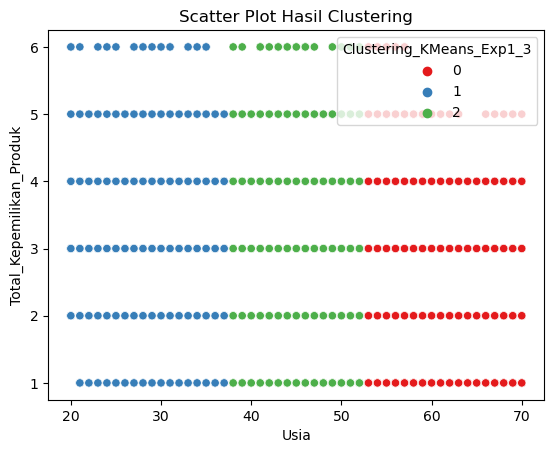

In [ ]:
sns.scatterplot(data=df_new, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

### Insight :

- **Klaster 0 (Merah)** : Pelanggan dalam cluster ini memiliki usia yang lebih tua dan cenderung memiliki total kepemilikan produk yang cukup beragam.
- **Klaster 1 (Biru)** : Terlihat di sisi bawah grafik. Ini mungkin menunjukkan pelanggan dengan usia lebih muda dan kepemilikan produk yang lebih rendah. Bisa jadi mereka adalah pelanggan baru atau kurang tertarik pada produk yang ditawarkan.
- **Klaster 2 (Hijau)** : Terlihat di tengah grafik. Pelanggan dalam klaster ini cenderung memiliki jumlah kepemilikan produk yang sedang dan beragam usia. Ini bisa jadi mencerminkan pelanggan yang sudah sedikit lama menggunakan produk namun masih tidak terlalu banyak.

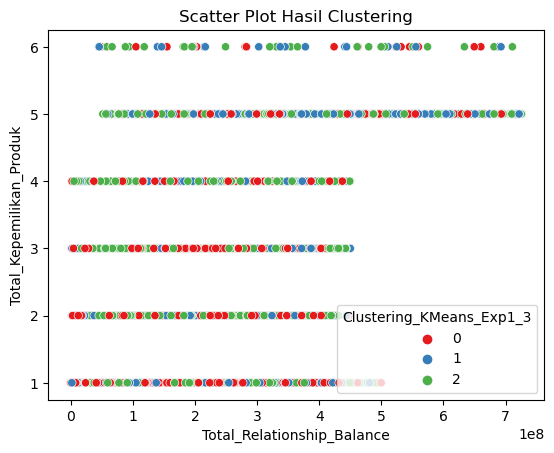

In [ ]:
sns.scatterplot(data=df_new, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

### Insight :

- **Cluster Merah (0)**:
  - **Karakteristik Umum**: Cluster ini cenderung berada pada bagian tengah-bawah grafik.
  - **Total_Relationship_Balance**: Pelanggan dalam cluster ini memiliki Total_Relationship_Balance yang cenderung lebih rendah dibandingkan cluster lainnya.
  - **Total_Kepemilikan_Produk**: Pelanggan dalam cluster ini cenderung memiliki Total_Kepemilikan_Produk yang lebih rendah.
  
- **Cluster Biru (1)**:
  - **Karakteristik Umum**: Cluster ini tersebar luas di sepanjang sumbu x dan y.
  - **Total_Relationship_Balance**: Pelanggan dalam cluster ini memiliki variasi nilai Total_Relationship_Balance yang cukup besar, mulai dari nilai rendah hingga tinggi.
  - **Total_Kepemilikan_Produk**: Pelanggan dalam cluster ini cenderung memiliki Total_Kepemilikan_Produk yang bervariasi, mencakup semua rentang dari 1 hingga 6.

- **Cluster Hijau (2)**:
  - **Karakteristik Umum**: Cluster ini cenderung berada di bagian atas-tengah grafik.
  - **Total_Relationship_Balance**: Pelanggan dalam cluster ini memiliki Total_Relationship_Balance yang lebih tinggi dibandingkan cluster lainnya.
  - **Total_Kepemilikan_Produk**: Pelanggan dalam cluster ini cenderung memiliki Total_Kepemilikan_Produk yang lebih tinggi.

### Kesimpulan
- Cluster merah cenderung terdiri dari pelanggan dengan Total_Relationship_Balance dan Total_Kepemilikan_Produk yang lebih rendah, menunjukkan bahwa mereka mungkin pelanggan baru atau dengan hubungan yang kurang aktif.
- Cluster biru menunjukkan variasi yang luas dalam Total_Relationship_Balance dan Total_Kepemilikan_Produk, mencerminkan berbagai jenis pelanggan dengan kebutuhan dan kontribusi yang berbeda.
- Cluster hijau cenderung terdiri dari pelanggan dengan nilai Total_Relationship_Balance dan Total_Kepemilikan_Produk yang lebih tinggi, menunjukkan bahwa mereka adalah pelanggan setia dengan hubungan yang kuat dan banyak produk yang dimiliki.

In [ ]:
cluster_means = df_new[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
print(cluster_means)
pd

                               Usia  Jumlah_Anak  Produk_Tabungan  \
Clustering_KMeans_Exp1_3                                            
0                         58.840056     1.474672         0.657129   
1                         29.503177     1.191528         1.000000   
2                         45.571206     1.310945         0.983520   

                          Produk_Deposito  Produk_Kartu_Kredit  \
Clustering_KMeans_Exp1_3                                         
0                                0.600844             0.338649   
1                                0.592436             0.308018   
2                                0.602612             0.336443   

                          Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
Clustering_KMeans_Exp1_3                                                 
0                                    0.618668                 0.168386   
1                                    0.586989                 0.157337   
2                          

<module 'pandas' from 'D:\\Anaconda\\Lib\\site-packages\\pandas\\__init__.py'>

### Cluster group 0

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2132.000000,2132.000000,2132.000000,2.132000e+03
mean,58.840056,1.474672,2.930113,2.389776e+08
std,5.133619,1.467245,1.041285,1.379077e+08
min,53.000000,0.000000,1.000000,1.028000e+03
25%,55.000000,0.000000,2.000000,1.266333e+08
50%,57.000000,1.000000,3.000000,2.328763e+08
75%,62.000000,3.000000,4.000000,3.493216e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==0]['Area'].value_counts(normalize=True)

Area
Jakarta     0.478893
Bandung     0.166041
Solo        0.128987
Surabaya    0.126173
Jogja       0.072702
Bogor       0.027205
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==0]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.486867
< 1 Tahun      0.313321
> 4 Tahun      0.199812
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==0]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.258443
SD                      0.204972
SMA                     0.180113
Tidak Sekolah Formal    0.101313
Magister                0.088180
SMP                     0.083959
Doktor                  0.083021
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==0]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.668386
Perempuan    0.331614
Name: proportion, dtype: float64

### Cluster group 1

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

Area
Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.501967
< 1 Tahun      0.293192
> 4 Tahun      0.204841
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.274130
SMA                     0.192436
SD                      0.180333
Doktor                  0.097731
Magister                0.087443
SMP                     0.084720
Tidak Sekolah Formal    0.083207
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.640847
Perempuan    0.359153
Name: proportion, dtype: float64

### Cluster group 2

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3216.000000,3216.000000,3216.000000,3.216000e+03
mean,45.571206,1.310945,3.157960,2.377450e+08
std,4.278838,1.482616,1.045431,1.437032e+08
min,38.000000,0.000000,1.000000,1.384147e+06
25%,42.000000,0.000000,2.000000,1.166975e+08
50%,46.000000,1.000000,3.000000,2.309003e+08
75%,50.000000,3.000000,4.000000,3.468400e+08
max,52.000000,4.000000,6.000000,7.259942e+08


In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==2]['Area'].value_counts(normalize=True)

Area
Jakarta     0.484142
Bandung     0.161692
Surabaya    0.131530
Solo        0.112562
Jogja       0.081468
Bogor       0.028607
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==2]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.503731
< 1 Tahun      0.295398
> 4 Tahun      0.200871
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==2]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.273321
SD                      0.181592
SMA                     0.180037
SMP                     0.095771
Doktor                  0.093905
Tidak Sekolah Formal    0.089552
Magister                0.085821
Name: proportion, dtype: float64

In [ ]:
df_new[df_new['Clustering_KMeans_Exp1_3']==2]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.678483
Perempuan    0.321517
Name: proportion, dtype: float64

### Conclusion :

1. **Cluster 0**:
   - **Karakteristik Pelanggan**: Pelanggan dalam cluster ini cenderung lebih muda dan memiliki total kepemilikan produk yang lebih sedikit.
   - **Strategi Pemasaran**: Dapat difokuskan pada penawaran produk dasar dan edukasi finansial untuk meningkatkan pemahaman serta penggunaan produk bank lainnya.

2. **Cluster 1**:
   - **Karakteristik Pelanggan**: Pelanggan dalam cluster ini memiliki variasi usia dan total kepemilikan produk yang luas. Mereka merupakan campuran dari pelanggan muda hingga tua dengan berbagai kebutuhan finansial.
   - **Strategi Pemasaran**: Penawaran yang disesuaikan, mulai dari produk dasar hingga produk premium, serta layanan konsultasi untuk memahami kebutuhan spesifik masing-masing segmen.

3. **Cluster 2**:
   - **Karakteristik Pelanggan**: Pelanggan dalam cluster ini cenderung lebih tua dan memiliki total kepemilikan produk yang lebih tinggi. Mereka adalah pelanggan yang setia dan memiliki hubungan yang kuat dengan bank.
   - **Strategi Pemasaran**: Fokus pada penawaran produk premium, peningkatan layanan pelanggan, serta program loyalitas untuk mempertahankan hubungan dan meningkatkan penggunaan produk tambahan.

### Insight Umum
- **Variasi Total Kepemilikan Produk**: Terdapat korelasi antara usia dan total kepemilikan produk. Pelanggan yang lebih tua cenderung memiliki lebih banyak produk bank, yang mencerminkan hubungan yang lebih lama dan kebutuhan finansial yang lebih kompleks.
- **Segmentasi yang Efektif**: Hasil clustering ini menunjukkan pentingnya segmentasi pelanggan untuk mengidentifikasi kelompok dengan karakteristik dan kebutuhan yang berbeda. Dengan memahami setiap cluster, bank dapat merancang strategi pemasaran yang lebih efektif dan personalisasi penawaran produk.

### Rekomendasi
- **Edukasi dan Peningkatan Pemahaman**: Untuk pelanggan yang lebih muda dengan kepemilikan produk rendah, bank dapat mengadakan program edukasi finansial dan workshop untuk meningkatkan pemahaman tentang produk-produk perbankan.
- **Penawaran Produk yang Disesuaikan**: Untuk pelanggan dengan variasi kebutuhan yang luas, bank dapat menawarkan produk yang lebih disesuaikan, mulai dari produk dasar hingga premium.
- **Program Loyalitas dan Layanan Premium**: Untuk pelanggan setia dengan hubungan yang kuat, bank dapat memperkenalkan program loyalitas dan layanan premium untuk meningkatkan kepuasan dan retensi pelanggan.